<a href="https://colab.research.google.com/github/nirvanK11/Mapping-Text-based-Review-to-Star-Rating/blob/main/FAke_review_detection_final_project_using_w2v_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# IMPORTING THE ESSENTIAL LIBRARIES
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras import layers
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from numpy import asarray
from numpy import zeros
from sklearn import preprocessing
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import nltk
nltk.download('punkt')
import gensim

ImportError: ignored

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/fake reviews dataset (1).csv")

In [ ]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df1 = df.drop(['category'],axis=1)

In [ ]:
df1.head()

,rating,label,text_
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


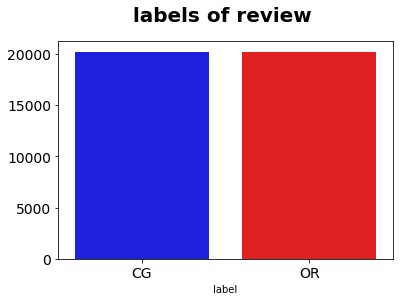

In [ ]:
a = sns.countplot(x=df['label'], palette=['blue', 'red'])
a.set_title('labels of review ', fontsize=20, pad=20, fontdict={'weight':'bold'})
a.set_xlabel('label')
a.set_ylabel('')
a.tick_params(labelsize=14)



In [ ]:
df1['rating'] = df1['rating'].astype(int)

In [ ]:
df1['rating'].dtype

dtype('int64')

In [ ]:
df1.head()

,rating,label,text_
0,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,5,CG,"love it, a great upgrade from the original. I..."
2,5,CG,This pillow saved my back. I love the look and...
3,1,CG,"Missing information on how to use it, but it i..."
4,5,CG,Very nice set. Good quality. We have had the s...


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

In [ ]:
!wget https://www.dropbox.com/s/s0t0fd15oedqznt/Datasets.csv

--2022-11-09 20:38:43--  https://www.dropbox.com/s/s0t0fd15oedqznt/Datasets.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/s0t0fd15oedqznt/Datasets.csv [following]
--2022-11-09 20:38:43--  https://www.dropbox.com/s/raw/s0t0fd15oedqznt/Datasets.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0573069cfe4bc7c47522f1296.dl.dropboxusercontent.com/cd/0/inline/BwekPcJ3PktsjhazCKZtoeJuecwO7Gbt-cQ77yXBFIgtJUXsv5eMTJGdn8ypMzY8KBBypi6x5BfmfjNPAZjbdKOrgkOP92aoJ4gNNUSLUvbSiSxgzPhVBGqYqNa-CsxExDj5-mtyAA0yLEGm4AqmuzHidYATGtL1fNg4ePAvN3Iovg/file# [following]
--2022-11-09 20:38:44--  https://ucb0573069cfe4bc7c47522f1296.dl.dropboxusercontent.com/cd/0/inline/BwekPcJ3PktsjhazCKZtoeJuecwO7Gbt-cQ77yXBFIgtJUXsv5eMTJGdn8ypMzY8KBBypi6x5BfmfjN

In [ ]:
# GETTING THE TEXT AND THE LABELS
rating = df1.iloc[:, 0]
label = df1.iloc[:, 1]
text = df1.iloc[:, 2]

In [ ]:
print(rating.dtype)
print(label.dtype)
print(text.dtype)

int64
object
object


In [ ]:
label_encoder = preprocessing.LabelEncoder()
encoded_labels= label_encoder.fit_transform(label)
#categorical_labels = pd.get_dummies(labels)

NameError: ignored

In [ ]:
encoded_labels.dtype

In [ ]:
y = df['text_'].iloc[:28302]



In [ ]:
# Tockonizing the sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for text_view in text:
  sents=tokenizer.tokenize(text_view.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())

In [ ]:

!pip install gensim

In [ ]:
from gensim.models import word2vec

In [ ]:
# Applying the word embeddings
w2v_model = gensim.models.Word2Vec(sentences=sentences,size=100,window=10,min_count=1)

In [ ]:
# Total number of words
vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(vocab))

In [ ]:
# Number of key-value pairs
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

In [ ]:
# To pad, we need to find the maximum lenght of any document.
maximum = -1
for i, text_sentence in enumerate(y):
  tokens = text_sentence.split()
  if(len(tokens) > maximum):
    maximum = len(tokens)
print(maximum)

In [ ]:
t = df['text_'].iloc[28302:]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y)

X_train = tokenizer.texts_to_sequences(df['text_'].iloc[:28302])
X_test = tokenizer.texts_to_sequences(df['text_'].iloc[28302:])

vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding='post', maxlen=maximum)
X_test = pad_sequences(X_test, padding='post', maxlen=maximum)

In [ ]:
df_1 = pd.DataFrame(X_train)

In [ ]:
df_1 = pd.DataFrame(X_test)

In [ ]:
df_1

In [ ]:
df_1['FieldName'] = (df['rating']).astype(int)


In [ ]:
df_1

In [ ]:
df_2 = pd.DataFrame(encoded_labels)

In [ ]:
y_train = df_2.iloc[:28302]

In [ ]:
y_test = df_2.iloc[28302:]

In [ ]:
# Word2Word Embedding
embed_matrix=np.zeros(shape=(vocab_size, 100))
for word,i in tokenizer.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train,y_train)

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test)))
print ("Area under ROC curve:: ",multiclass_roc_auc_score(y_test,lr.predict(X_test)))

cnf_matrix = metrics.confusion_matrix(y_test, lr.predict(X_test))


class_names=[1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import seaborn as sns






svm = LinearSVC()
svm.fit(X_train,y_train)

print ("Multinomial SVM Train Accuracy :: ", metrics.accuracy_score(y_train, svm.predict(X_train)))
print ("Multinomial SVM Test Accuracy :: ", metrics.accuracy_score(y_test, svm.predict(X_test)))
print ("Area under ROC curve:: ",multiclass_roc_auc_score(y_test,svm.predict(X_test)))

cnf_matrix = metrics.confusion_matrix(y_test, svm.predict(X_test))
cnf_matrix

class_names=[1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# CREATING LSTM MODEL
deep_inputs = Input(373)
embedding_layer = Embedding(vocab_size, 100, weights=[embed_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# CREATING LSTM MODEL
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim= 100 ,input_length=maximum, weights = [embed_matrix]))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions